<a href="https://colab.research.google.com/github/Ridha273/solar-activity/blob/main/Asymmetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

## Separating data by latitude

In [ ]:
Ns = []
Ss = []
Ts = list(range(1964,2017))
for i in Ts:
    data = ascii.read('sunspot-data.csv')
    n = 0
    s = 0
    for j in range(len(data)):
        if data[j]['lat']>=0:
            n = n+1
        else:
            s = s+1
    Ns.append(n)
    Ss.append(s)

In [ ]:
Nc = []
Sc = []
Tc = list(range(1996,2014))
for i in Tc:
    data = ascii.read('coronal-hole-data.csv')
    n = 0
    s = 0
    for j in range(len(data)):
        if data[j]['lat']>=0:
            n = n+1
        else:
            s = s+1
    Nc.append(n)
    Sc.append(s)

## Calculating Asymmetry

In [ ]:
ass = []
for (i,j) in zip(Ns,Ss):
    a = (i-j)/(i+j)
    ass.append(a)

In [ ]:
ach = []
for (p,q) in zip(Nc,Sc):
    b=(p-q)/(p+q)
    ach.append(b)

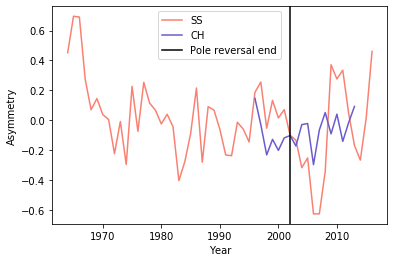

In [ ]:
plt.plot(Ts,ass, color='salmon', label = 'SS')
plt.plot(Tc,ach, color='slateblue', label = 'CH')
plt.axvline(2001.9, -1, 1, color='black', label = 'Pole reversal end')
plt.xlabel('Year')
plt.ylabel('Asymmetry')
plt.legend()

## Correlation

In [ ]:
import scipy.stats.stats as sr
print(sr.pearsonr(ass[32:50],ach))
print(sr.spearmanr(ass[32:50],ach))
print(sr.pointbiserialr(ass[32:50],ach))
print(sr.kendalltau(ass[32:50],ach))

(0.1817283554357422, 0.4704788509654782)
SpearmanrResult(correlation=0.040247678018575844, pvalue=0.8740147776078566)
PointbiserialrResult(correlation=0.1817283554357422, pvalue=0.4704788509654782)
KendalltauResult(correlation=0.045751633986928116, pvalue=0.8228244054912468)
